### Step 1: Data Preprocessing
-Data Collection: Ensure you have a well-labeled dataset of children's facial images, including those with and without autism spectrum disorder.
-Data Augmentation: Augment the dataset to increase diversity and improve model generalization.
-Data Splitting: Divide the dataset into training, validation, and testing sets.

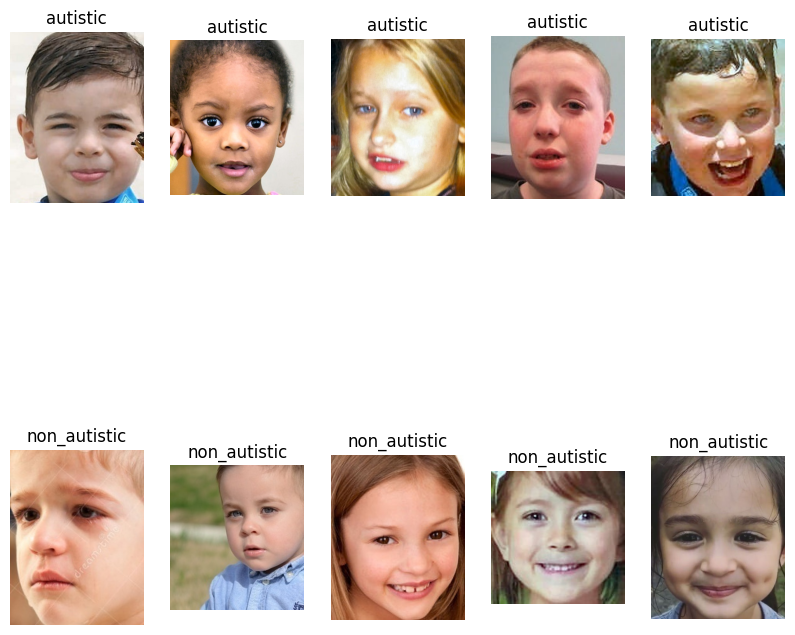

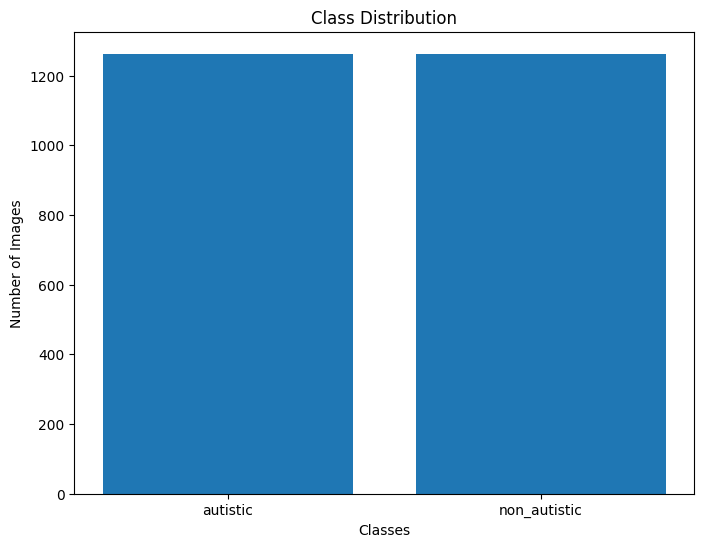

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset directories
base_dir = r"C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Function to display sample images
def plot_sample_images(directory, num_samples=5):
    classes = os.listdir(directory)
    plt.figure(figsize=(10, 10))
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        samples = np.random.choice(os.listdir(class_dir), num_samples)
        for i, sample in enumerate(samples):
            img_path = os.path.join(class_dir, sample)
            img = plt.imread(img_path)
            plt.subplot(len(classes), num_samples, num_samples*classes.index(class_name) + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
    plt.show()

# Function for class distribution visualization
def plot_class_distribution(directory):
    classes = os.listdir(directory)
    class_counts = Counter()
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        class_count = len(os.listdir(class_dir))
        class_counts[class_name] = class_count
    
    plt.figure(figsize=(8, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.show()

# EDA - Display sample images and class distribution
plot_sample_images(train_dir)
plot_class_distribution(train_dir)

### Step 2: Model Selection
CNN Architecture Selection: Choose a suitable CNN architecture for image classification.
 Pre-trained models (e.g., VGG, ResNet, Inception) could be a good starting point due to their established performance on image-related tasks.
Model Customization: Fine-tune or adapt the selected pre-trained model to suit your dataset and task. Adjust the final layers for binary classification (autism/non-autism

### Step 3: Training
Train/Test/Validation Split: Divide the dataset into training, testing, and validation sets.
Model Training: Train the CNN model using the training set. Monitor metrics like accuracy, loss, precision, recall, and F1-score.
Hyperparameter Tuning: Experiment with learning rates, optimizers (Adam, RMSprop, SGD), batch sizes, and epochs to optimize the model's performance.
Regularization Techniques: Implement regularization techniques (dropout, batch normalization) to prevent overfitting.

### Step 4: Evaluation and Validation
Model Evaluation: Evaluate the trained model using the validation set. Calculate various metrics to assess its performance.
Fine-tuning: If needed, fine-tune the model based on validation results to further improve performance.
Cross-validation: Implement cross-validation to ensure the model's stability and generalization.).s.

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\hp\Anaconda3\envs\autism\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
79/79 [==============================] - 85s 1s/step - loss: 0.6833 - accuracy: 0.5574 - val_loss: 0.6560 - val_accuracy: 0.6000
Epoch 2/10
79/79 [==============================] - 79s 996ms/step - loss: 0.6302 - accuracy: 0.6469 - val_loss: 0.6239 - val_accuracy: 0.6500
Epoch 3/10
79/79 [==============================] - 82s 1s/step - loss: 0.5972 - accuracy: 0.6809 - val_loss: 0.6263 - val_accuracy: 0.6050
Epoch 4/10
79/79 [==============================] - 80s 1s/step - loss: 0.6072 - accuracy: 0.6690 - val_loss: 0.6141 - val_accuracy: 0.6800
Epoch 5/10
79/79 [==============================] - 100s 1s/step - loss: 0.5906 - accuracy: 0.6746 - val_loss: 0.5828 - val_accuracy: 0.7100
Epoch 6/10
79/79 [==============================] - 95s 1s/step - loss: 0.5729 - accuracy: 0.6975 - val_loss: 0.5887 - val_accuracy: 0.6650
Epoch 7/10
79/79 [==============================] - 88s 1s/step - loss: 0.5722 - accuracy: 0.7015 - val_loss: 0.5655 - val_accuracy: 0.7150
Epoch 8/10
79/79

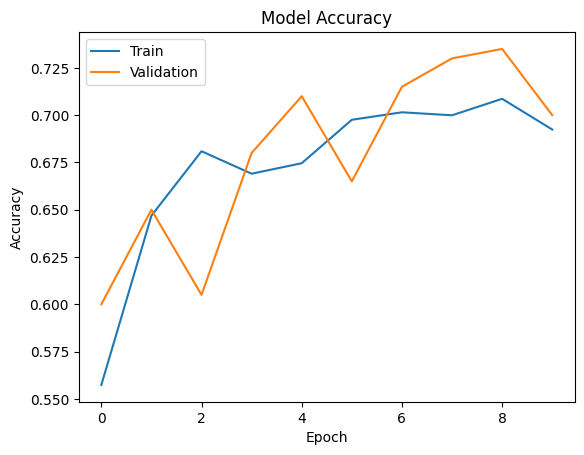

7/7 [==============================] - 1s 174ms/step - loss: 0.4733 - accuracy: 0.7550
Test Loss: 0.473319411277771
Test Accuracy: 0.7549999952316284


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define directories for train, validation, and test
train_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\train'
val_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\valid'
test_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\test'

# Define image dimensions and other parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 10

# Create ImageDataGenerators for train, validation, and test sets with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_scores = model.evaluate(test_generator)
print(f'Test Loss: {test_scores[0]}')
print(f'Test Accuracy: {test_scores[1]}')

### To enhance the overall accuracy, you can consider a few strategies:

Increase Model Complexity: Try adding more convolutional layers or increasing the number of neurons in the dense layers. 
                           However, be cautious not to overfit the model.

Fine-tuning Hyperparameters: Experiment with different learning rates, optimizer settings, batch sizes, or activation functions. 
                            Adjusting these hyperparameters might lead to better performance.

Further Regularization: Besides dropout, consider other regularization techniques like L2 regularization or batch normalization to prevent overfitting.

Data Augmentation Variations: Explore different augmentation techniques or adjust the range of existing ones. 
                        Sometimes, a slight change in augmentation parameters can impact model generalization positively.

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
79/79 [==============================] - 78s 963ms/step - loss: 0.6892 - accuracy: 0.5495 - val_loss: 0.6669 - val_accuracy: 0.6050
Epoch 2/10
79/79 [==============================] - 79s 995ms/step - loss: 0.6581 - accuracy: 0.6053 - val_loss: 0.6118 - val_accuracy: 0.6750
Epoch 3/10
79/79 [==============================] - 105s 1s/step - loss: 0.6179 - accuracy: 0.6548 - val_loss: 0.5929 - val_accuracy: 0.6800
Epoch 4/10
79/79 [==============================] - 90s 1s/step - loss: 0.6047 - accuracy: 0.6686 - val_loss: 0.6032 - val_accuracy: 0.6950
Epoch 5/10
79/79 [==============================] - 93s 1s/step - loss: 0.5896 - accuracy: 0.6809 - val_loss: 0.6058 - val_accuracy: 0.6550
Epoch 6/10
79/79 [==============================] - 97s 1s/step - loss: 0.5764 - accuracy: 0.6912 - val_loss: 0.5689 - val_accuracy: 0.6800
Epoch 7/10
79/79 [===========

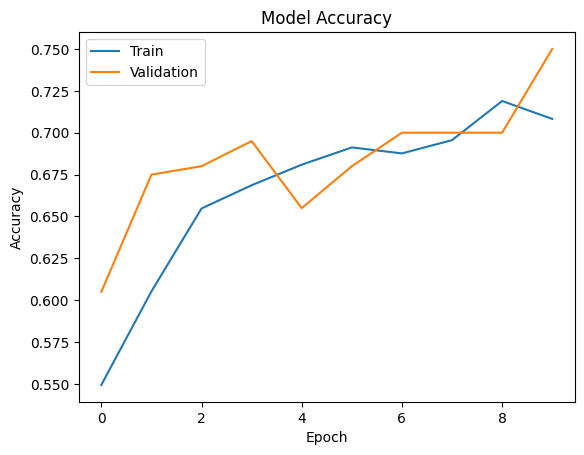

7/7 [==============================] - 1s 168ms/step - loss: 0.4518 - accuracy: 0.7900
Test Loss: 0.4517560601234436
Test Accuracy: 0.7900000214576721
Epoch 1/10
79/79 [==============================] - 101s 1s/step - loss: 0.6773 - accuracy: 0.5590 - val_loss: 0.7062 - val_accuracy: 0.5450
Epoch 2/10
79/79 [==============================] - 98s 1s/step - loss: 0.6331 - accuracy: 0.6413 - val_loss: 0.6090 - val_accuracy: 0.6600
Epoch 3/10
79/79 [==============================] - 96s 1s/step - loss: 0.6171 - accuracy: 0.6572 - val_loss: 0.6397 - val_accuracy: 0.5950
Epoch 4/10
79/79 [==============================] - 97s 1s/step - loss: 0.6089 - accuracy: 0.6508 - val_loss: 0.6072 - val_accuracy: 0.6450
Epoch 5/10
79/79 [==============================] - 102s 1s/step - loss: 0.5977 - accuracy: 0.6639 - val_loss: 0.5939 - val_accuracy: 0.7050
Epoch 6/10
79/79 [==============================] - 102s 1s/step - loss: 0.5891 - accuracy: 0.6797 - val_loss: 0.6127 - val_accuracy: 0.6750
Epoch 

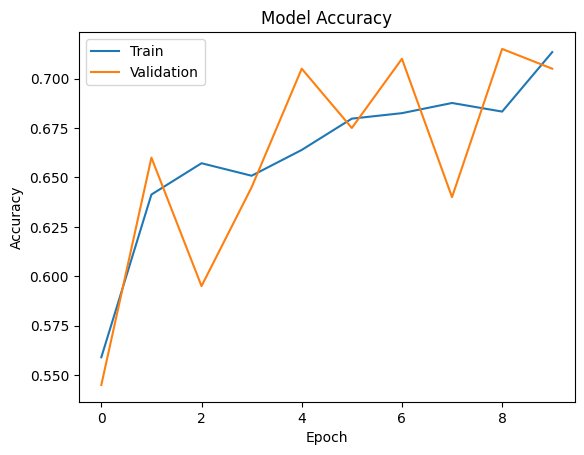

7/7 [==============================] - 2s 209ms/step - loss: 0.4289 - accuracy: 0.7900
Test Loss: 0.4289211928844452
Test Accuracy: 0.7900000214576721


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define directories for train, validation, and test
train_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\train'
val_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\valid'
test_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\test'

# Define image dimensions and other parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 10

# Create ImageDataGenerators for train, validation, and test sets with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_scores = model.evaluate(test_generator)
print(f'Test Loss: {test_scores[0]}')
print(f'Test Accuracy: {test_scores[1]}')

# Create a CNN model with increased complexity
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))  # Increased complexity
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_scores = model.evaluate(test_generator)
print(f'Test Loss: {test_scores[0]}')
print(f'Test Accuracy: {test_scores[1]}')

In [7]:
# Save the trained model
model.save('my_trained_model.h5')  # Adjust 'my_trained_model.h5' to your preferred file name

### Class Imbalance:
Check for class imbalances in your dataset. If present, use techniques like oversampling, undersampling, or class weights to handle this issue.

In [26]:
from collections import Counter

# Assuming train_generator is your training data generator
class_counts = Counter(train_generator.classes)
print("Class Counts:", class_counts)

# Calculate proportions
total_samples = sum(class_counts.values())
class_proportions = {class_name: count / total_samples for class_name, count in class_counts.items()}
print("Class Proportions:", class_proportions)


Class Counts: Counter({0: 1263, 1: 1263})
Class Proportions: {0: 0.5, 1: 0.5}


### This code initializes VGG16 and InceptionV3 models, adds custom layers on top, compiles them, trains them, and evaluates their performance on the test set separately.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, InceptionV3

# Define directories for train, validation, and test
train_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\train'
val_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\valid'
test_dir = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\test'

# Define image dimensions and other parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 10

# Create ImageDataGenerators for train, validation, and test sets with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

def build_model(model_name):
    base_model = model_name(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create VGG16-based model
model_vgg = build_model(VGG16)

# Train the VGG16-based model
history_vgg = model_vgg.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the VGG16-based model on the test set
test_scores_vgg = model_vgg.evaluate(test_generator)
print(f'VGG16 Test Loss: {test_scores_vgg[0]}')
print(f'VGG16 Test Accuracy: {test_scores_vgg[1]}')

# Create InceptionV3-based model
model_inception = build_model(InceptionV3)

# Train the InceptionV3-based model
history_inception = model_inception.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the InceptionV3-based model on the test set
test_scores_inception = model_inception.evaluate(test_generator)
print(f'InceptionV3 Test Loss: {test_scores_inception[0]}')
print(f'InceptionV3 Test Accuracy: {test_scores_inception[1]}')

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\hp\Anaconda3\envs\autism\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
79/79 [==============================] - 248s 3s/step - loss: 0.6994 - accuracy: 0.5451 - val_loss: 0.6638 - val_accuracy: 0.5900
Epoch 2/10
79/79 [==============================] - 238s 3s/step - loss: 0.6647 - accuracy: 0.5958 - val_loss: 0.6619 - val_accuracy: 0.6100
Epoch 3/10
79/79 [==============================] - 235s 3s/step - loss: 0.6342 - accuracy: 0.6366 - val_loss: 0.6506 - val_accuracy: 0.6150
Epoch 4/10
79/79 [==============================] - 236s 3s/step - loss: 0.6200 - accuracy: 0.6508 - val_loss: 0.6291 - val_accuracy: 0.6700
Epoch 5/10
79/79 [==============================] - 240s 3s/step - loss: 0.6097 - accuracy: 0.6584 - val_loss: 0.6227 - val_accuracy: 0.6550
Epoch 6/10
79/79 [==============================] - 271s 3s/step - loss: 0.5952 - accuracy: 0.6762 - val_loss: 0.6315 - val_accuracy: 0.6500
Epoch 7/10
79/79 [==============================] - 241s 3s/step - loss: 0.5886 - accuracy: 0.6825 - val_loss: 0.6116 - val_accuracy: 0.6750
Epoch 8/10
79

### Transfer Learning:
Utilize pre-trained models (like VGG16, ResNet, etc.) as a base and perform transfer learning. This involves using a pre-trained model's weights and fine-tuning the model on your specific dataset. This can be achieved by freezing certain layers of the pre-trained model and training only specific layers or adding new ones for your classification task.

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten

# Load pre-trained VGG16 model without top layers and with imagenet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate on the test set
test_scores = model.evaluate(test_generator)
print(f'Test Loss: {test_scores[0]}')
print(f'Test Accuracy: {test_scores[1]}')


Epoch 1/10
79/79 [==============================] - 296s 4s/step - loss: 0.6491 - accuracy: 0.6390 - val_loss: 0.5919 - val_accuracy: 0.6850
Epoch 2/10
79/79 [==============================] - 272s 3s/step - loss: 0.5688 - accuracy: 0.7003 - val_loss: 0.5735 - val_accuracy: 0.7100
Epoch 3/10
79/79 [==============================] - 273s 3s/step - loss: 0.5429 - accuracy: 0.7280 - val_loss: 0.5507 - val_accuracy: 0.6900
Epoch 4/10
79/79 [==============================] - 263s 3s/step - loss: 0.5427 - accuracy: 0.7253 - val_loss: 0.5355 - val_accuracy: 0.7100
Epoch 5/10
79/79 [==============================] - 486s 6s/step - loss: 0.5178 - accuracy: 0.7371 - val_loss: 0.5403 - val_accuracy: 0.7250
Epoch 6/10
79/79 [==============================] - 311s 4s/step - loss: 0.5222 - accuracy: 0.7344 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 7/10
79/79 [==============================] - 300s 4s/step - loss: 0.5017 - accuracy: 0.7506 - val_loss: 0.5094 - val_accuracy: 0.7600
Epoch 8/10
79

In [1]:
# Save the trained model
model.save('my_trained_modelvvg15.h5')

NameError: name 'model' is not defined

In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('my_trained_model.h5')

# Path to the folder containing the images
folder_path = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\tests_non_autistic'

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    # Read and preprocess the image
    image = cv2.imread(os.path.join(folder_path, filename))
    image = cv2.resize(image, (224, 224))  # Resize the image to match the input size of the model
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add an extra dimension to match the input shape of the model

    # Make predictions on the image
    predictions = model.predict(image)

    print(f'Prediction for {filename}: {predictions}')

1/1 [==============================] - 0s 54ms/step
Prediction for 0001.jpg: [[[[0.         0.26481742 0.39949498 ... 0.7235054  0.58990836
    0.2940172 ]
   [0.         0.26318318 0.39982647 ... 0.7251374  0.5900535
    0.29548   ]
   [0.         0.26252687 0.40177625 ... 0.72372305 0.59406996
    0.2974259 ]
   ...
   [0.         0.27162686 0.41056216 ... 0.7507685  0.6135842
    0.31011656]
   [0.         0.27109978 0.40884575 ... 0.7512668  0.6130799
    0.31010202]
   [0.         0.2716104  0.40882596 ... 0.75162864 0.613444
    0.31023508]]

  [[0.         0.2654449  0.39983344 ... 0.72467804 0.5910857
    0.29520795]
   [0.         0.2650215  0.4021995  ... 0.7277526  0.5940882
    0.29649386]
   [0.         0.26648065 0.40324533 ... 0.72453195 0.5950026
    0.29617572]
   ...
   [0.         0.27176347 0.41111538 ... 0.75040287 0.61362904
    0.31066614]
   [0.         0.2691201  0.41023785 ... 0.75062156 0.61434126
    0.3104959 ]
   [0.         0.27011132 0.41008577 ... 0.750

### Make Predictions on the test set

In [16]:

import os
import cv2
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('my_trained_modelvvg15.h5')

# Path to the folder containing the images
folder_path = r'C:\Users\hp\OneDrive\Desktop\Project\autism project\Autism Final\tests_non_autistic'

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    # Read and preprocess the image
    image = cv2.imread(os.path.join(folder_path, filename))
    image = cv2.resize(image, (224, 224))  # Resize the image to match the input size of the model
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add an extra dimension to match the input shape of the model

    # Make predictions on the image
    predictions = model.predict(image)

    # Define a threshold (e.g., 0.5)
    threshold = 0.5
    
    # Assign labels based on the threshold
    if predictions[0][0] > threshold:
        label = 'Not Autistic'
    else:
        label = 'Autistic'

    print(f'Prediction for {filename}: {label} (Confidence: {predictions[0][0]})')


1/1 [==============================] - 0s 268ms/step
Prediction for 001.jpg: Autistic (Confidence: 0.12675820291042328)
1/1 [==============================] - 0s 140ms/step
Prediction for 002.jpg: Autistic (Confidence: 0.2720663547515869)
1/1 [==============================] - 0s 125ms/step
Prediction for 003.jpg: Autistic (Confidence: 0.2517334818840027)
1/1 [==============================] - 0s 109ms/step
Prediction for 004.jpg: Not Autistic (Confidence: 0.5364962816238403)
1/1 [==============================] - 0s 103ms/step
Prediction for 005.jpg: Autistic (Confidence: 0.16390319168567657)
1/1 [==============================] - 0s 143ms/step
Prediction for 006.jpg: Not Autistic (Confidence: 0.579352617263794)
1/1 [==============================] - 0s 136ms/step
Prediction for 007.jpg: Autistic (Confidence: 0.4573773443698883)
1/1 [==============================] - 0s 125ms/step
Prediction for 008.jpg: Autistic (Confidence: 0.20622283220291138)
1/1 [==============================] -